# EDA COVID PROJECT

## Imports

In [1]:
# Path
sys.path.append(os.path.dirname(os.path.dirname('D:\\Data Science\\Covid_Group_Project_E\\notebooks\\')))

# Imports
import pandas as pd
import sys
import os
from src.utils import folders_tb as ft
from src.utils import mining_data_tb as mdt

# Create objects
variable_creator = ft.Folders()
variable_miner = mdt.Miner()

## Get and clean data

In [2]:
# Assign the df to a first variable called first_visualitation
first_visualitation = variable_creator.open_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

# Clean the dataframe in order to have just the asked countries
df_required_countries = variable_miner.chosen_countries(first_visualitation,'location', 'Poland', 'South Africa', 'Ukraine', 'Indonesia', 'Spain')

# Turn the date column (string) into datetime.
df_required_countries = variable_miner.column_to_datetime(df_required_countries, 'date')

# Pivot table with date and countries as index (evolution per date)
date_location_pivot_table = variable_miner.pivot_table_date_location(df_required_countries,'date', 'location')

# Better visualitation of the dataframe having the countries as index
df_required_countries = variable_miner.set_index_1(df_required_countries, 'location')

## Plot tests

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = df_required_countries
df

,iso_code,continent,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
location,,,,,,,,,,,,,,,,,,,,,
Poland,POL,Europe,2020-03-04,1.0,1.0,NaN,NaN,NaN,NaN,0.026,...,27216.445,NaN,227.331,5.91,23.3,33.1,NaN,6.62,78.73,0.865
Poland,POL,Europe,2020-03-05,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,27216.445,NaN,227.331,5.91,23.3,33.1,NaN,6.62,78.73,0.865
Poland,POL,Europe,2020-03-06,5.0,4.0,NaN,NaN,NaN,NaN,0.132,...,27216.445,NaN,227.331,5.91,23.3,33.1,NaN,6.62,78.73,0.865
Poland,POL,Europe,2020-03-07,5.0,0.0,NaN,NaN,NaN,NaN,0.132,...,27216.445,NaN,227.331,5.91,23.3,33.1,NaN,6.62,78.73,0.865
Poland,POL,Europe,2020-03-08,11.0,6.0,NaN,NaN,NaN,NaN,0.291,...,27216.445,NaN,227.331,5.91,23.3,33.1,NaN,6.62,78.73,0.865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Spain,ESP,Europe,2021-01-13,2176089.0,38869.0,27649.286,52878.0,195.0,206.857,46542.597,...,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891
Spain,ESP,Europe,2021-01-14,2211967.0,35878.0,26723.286,53079.0,201.0,200.571,47309.962,...,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891
Spain,ESP,Europe,2021-01-15,2252164.0,40197.0,28829.143,53314.0,235.0,205.714,48169.703,...,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891


In [4]:
country_list = list(df_required_countries.index.unique())

In [27]:
c_df = df.loc[df.index == country_list[-1]]

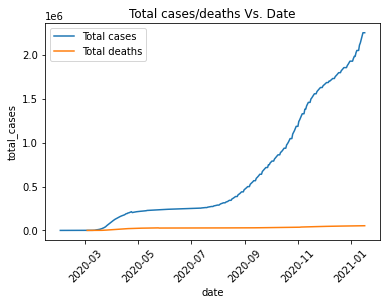

In [16]:
plot = sns.lineplot(x=c_df["date"], y=c_df["total_cases"], label="Total cases")
sns.lineplot(x=c_df["date"], y=c_df["total_deaths"], label="Total deaths")
plt.xticks(rotation=45)
plot.set(title="Total cases/deaths Vs. Date")
plt.legend()

plt.show()

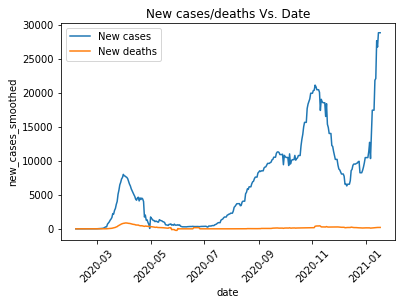

In [20]:
plot = sns.lineplot(x=c_df["date"], y=c_df["new_cases_smoothed"], label="New cases")
sns.lineplot(x=c_df["date"], y=c_df["new_deaths_smoothed"], label="New deaths")
plt.xticks(rotation=45)
plot.set(title="New cases/deaths Vs. Date")
plt.legend()

plt.show()

In [37]:
#removing constant columns
c_df = df.loc[df.index == country_list[-1]]
c_df.drop(columns=["iso_code", "continent", "human_development_index", "life_expectancy", "hospital_beds_per_thousand", \
                   "handwashing_facilities", "male_smokers", "female_smokers", "diabetes_prevalence", "cardiovasc_death_rate",\
                   "extreme_poverty", "gdp_per_capita", "aged_70_older", "aged_65_older", "median_age", "population_density", \
                   "population", "tests_per_case", "tests_units"], inplace = True)

list(c_df.columns)

['date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'total_vaccinations',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'new_vaccinations_smoothed_per_million',
 'stringency_index']

In [42]:
c_df.iloc[:,9:]

,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,...,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,total_vaccinations,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,new_vaccinations_smoothed_per_million,stringency_index
location,,,,,,,,,,,,,,,,,,,,,
Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11
Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11
Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11
Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11
Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Spain,591.368,1130.965,4.171,4.424,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,581638.0,93516.0,58330.0,1.24,1248.0,NaN
Spain,571.563,1135.264,4.299,4.290,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,676186.0,94548.0,66980.0,1.45,1433.0,NaN
Spain,616.603,1140.290,5.026,4.400,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,768950.0,92764.0,70139.0,1.64,1500.0,NaN


In [43]:
list(c_df.icu_patients)

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan